In [11]:
# pip install praw

In [12]:
# import praw
# import pandas as pd
# import time
# # Reddit API bağlantısı
# reddit = praw.Reddit(
#     client_id='RtD03h-SF1A7eHp-sKFuhA',
#     client_secret='ZuejDZsixBjIOGgJN7frbjyaEAGFAA',
#     user_agent='reddit_popularity_predictor'
# )
# subreddits = ['technology', 'news', 'funny', 'science', 'movies']
# # Subreddit seç (örnek: r/technology)
# posts = []
# for sub in subreddits:
#     subreddit = reddit.subreddit(sub)

#     # Postları çek

#     for post in subreddit.hot(limit=1000):  # hot, new, top gibi seçenekler var
#         posts.append({
#             'id': post.id,
#             'title': post.title,
#             'score': post.score,
#             'upvote_ratio': post.upvote_ratio,
#             'num_comments': post.num_comments,
#             'created_utc': post.created_utc,
#             'is_self': post.is_self,
#             'selftext': post.selftext,
#             'subreddit': post.subreddit.display_name
#         })
#     time.sleep(2)
#     # DataFrame’e çevir
# df = pd.DataFrame(posts)


In [13]:
# df.shape

In [14]:
# df.to_csv('reddit_posts.csv', index=False)


**Veriyi csv dosyasından okuma vakti**

In [15]:
import pandas as pd
import time

In [16]:
df = pd.read_csv('/content/reddit_posts.csv')

**Data Informations and Cleaning**

In [17]:
df.head()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit
0,1nqkw5r,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1.758840e+09,False,NaN,technology
1,1nqebg2,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1.758824e+09,False,NaN,technology
2,1nqigyn,Trump signs executive order to transfer TikTok...,5291,0.94,659,1.758834e+09,False,NaN,technology
3,1nqnqno,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,1.758848e+09,False,NaN,technology
4,1nqmb8m,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,1.758844e+09,False,NaN,technology


In [18]:
df.tail()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit
4986,1nhh4nf,I will never understand the slander behind Inc...,0,0.15,7,1.757928e+09,True,"With Incredibles 3 announced, it sparked up di...",movies
4987,1nfv9yv,Did John Ottoman win the Oscar for Bohemian Rh...,220,0.81,86,1.757763e+09,True,In 2019 Bohemian Rhapsody's John Ottman won th...,movies
4988,1ngwb2r,A mixture of Charlie Kaufman and PTA! Suggesti...,0,0.44,4,1.757869e+09,True,"Films like Synecdoche New York, The Master and...",movies
4989,1ng2fz7,"The Night Before The Battle, The Soldiers Sing...",77,0.82,11,1.757782e+09,False,NaN,movies
4990,1nh6p8c,Saw movies,0,0.44,7,1.757894e+09,True,Where can I watch the saw movies? I can’t find...,movies


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4991 non-null   object 
 1   title         4991 non-null   object 
 2   score         4991 non-null   int64  
 3   upvote_ratio  4991 non-null   float64
 4   num_comments  4991 non-null   int64  
 5   created_utc   4991 non-null   float64
 6   is_self       4991 non-null   bool   
 7   selftext      918 non-null    object 
 8   subreddit     4991 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 316.9+ KB


In [20]:
display(df.describe(include="object"))

,id,title,selftext,subreddit
count,4991,4991,918,4991
unique,4991,4969,918,5
top,1nh6p8c,Microsoft blocks Israel’s use of its technolog...,Where can I watch the saw movies? I can’t find...,movies
freq,1,2,1,1000


In [21]:
display(df.describe(include=["int","float"]))

,score,upvote_ratio,num_comments,created_utc
count,4991.000000,4991.000000,4991.000000,4.991000e+03
mean,3490.023843,0.794388,194.077740,1.757442e+09
std,9497.997117,0.227555,674.891186,1.487251e+06
min,0.000000,0.040000,0.000000,1.692927e+09
25%,19.000000,0.700000,7.000000,1.756595e+09
50%,304.000000,0.910000,34.000000,1.757880e+09
75%,2242.500000,0.960000,146.000000,1.758375e+09
max,123894.000000,1.000000,25992.000000,1.758878e+09


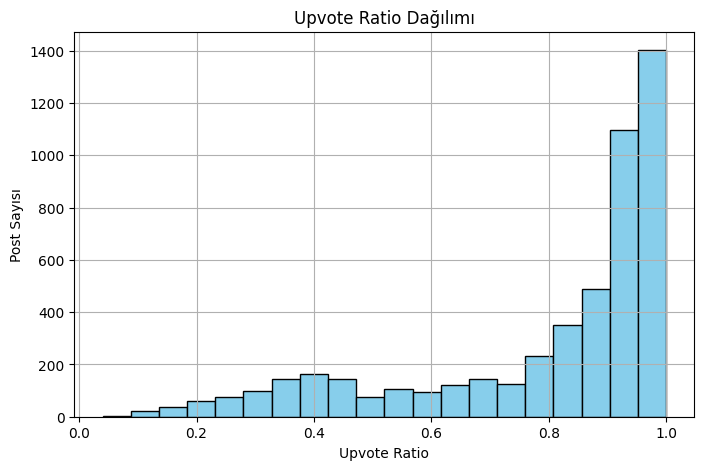

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['upvote_ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Upvote Ratio Dağılımı')
plt.xlabel('Upvote Ratio')
plt.ylabel('Post Sayısı')
plt.grid(True)
plt.show()


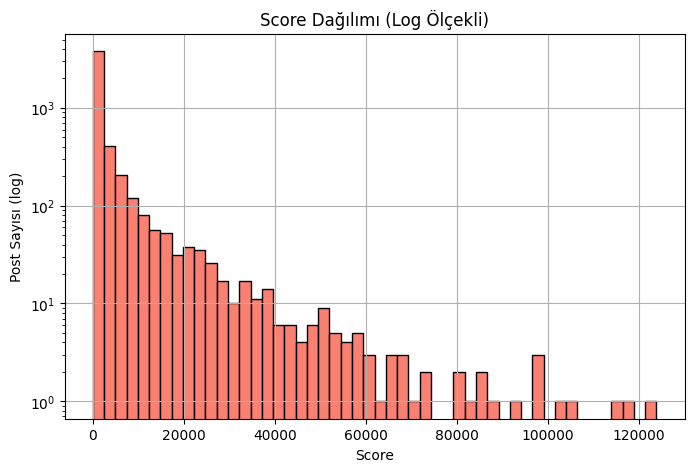

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(df['score'], bins=50, color='salmon', edgecolor='black', log=True)
plt.title('Score Dağılımı (Log Ölçekli)')
plt.xlabel('Score')
plt.ylabel('Post Sayısı (log)')
plt.grid(True)
plt.show()


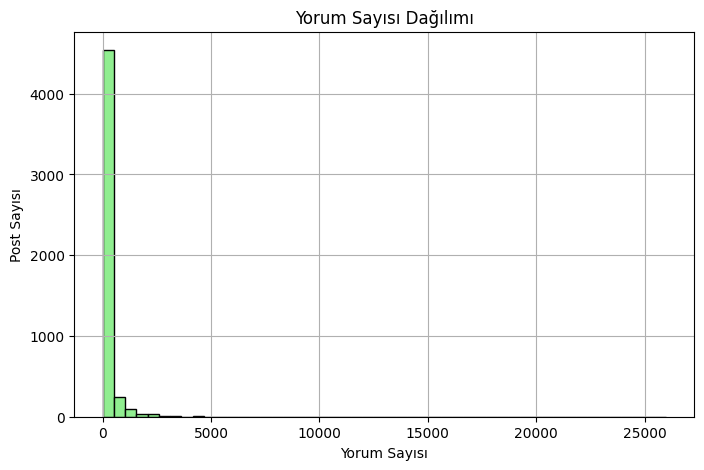

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(df['num_comments'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Yorum Sayısı Dağılımı')
plt.xlabel('Yorum Sayısı')
plt.ylabel('Post Sayısı')
plt.grid(True)
plt.show()


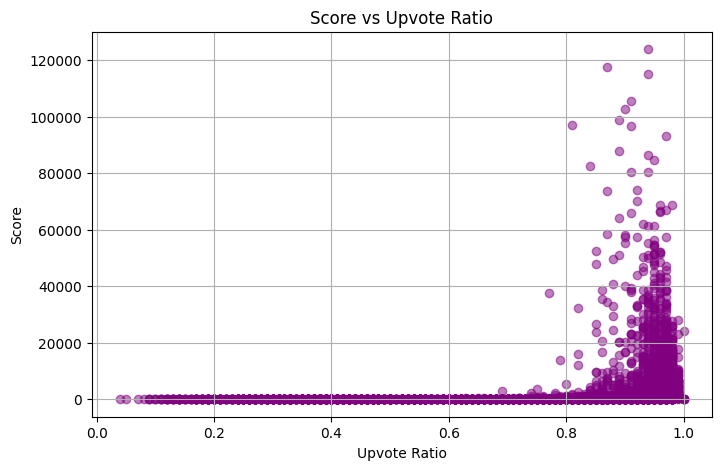

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(df['upvote_ratio'], df['score'], alpha=0.5, color='purple')
plt.title('Score vs Upvote Ratio')
plt.xlabel('Upvote Ratio')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [26]:
def label_popularity(row):
    if row['score'] > 3000 and row['upvote_ratio'] > 0.8 and row['num_comments'] > 150:
        return 'viral'
    elif row['score'] < 100 or row['num_comments'] < 20:
        return 'not_popular'
    else:
        return 'popular'

df['popularity_level'] = df.apply(label_popularity, axis=1)


In [27]:
df['popularity_level'] = df.apply(label_popularity, axis=1)
df.head()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit,popularity_level
0,1nqkw5r,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1.758840e+09,False,NaN,technology,viral
1,1nqebg2,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1.758824e+09,False,NaN,technology,viral
2,1nqigyn,Trump signs executive order to transfer TikTok...,5291,0.94,659,1.758834e+09,False,NaN,technology,viral
3,1nqnqno,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,1.758848e+09,False,NaN,technology,popular
4,1nqmb8m,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,1.758844e+09,False,NaN,technology,popular


In [28]:
print(df['popularity_level'].value_counts())


popularity_level
not_popular    2450
popular        1690
viral           851
Name: count, dtype: int64


In [29]:
y = df['popularity_level']
df2 = df.drop(columns=['id','is_self','selftext' , 'popularity_level'])
df2.head()

,title,score,upvote_ratio,num_comments,created_utc,subreddit
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1.758840e+09,technology
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1.758824e+09,technology
2,Trump signs executive order to transfer TikTok...,5291,0.94,659,1.758834e+09,technology
3,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,1.758848e+09,technology
4,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,1.758844e+09,technology


In [30]:
import pandas as pd

# Tarih formatını düzelt
df2['created_utc'] = pd.to_datetime(df2['created_utc'], unit='s')

# Başlık uzunluğu
df2['title_length'] = df2['title'].apply(len)

# Yorum başına skor
df2['score_per_comment'] = df2['score'] / (df['num_comments'] + 1)

# Gönderi saati
df2['hour'] = df2['created_utc'].dt.hour

# Hafta sonu mu?
df2['is_weekend'] = df2['created_utc'].dt.dayofweek >= 5


In [31]:
df2.head()

,title,score,upvote_ratio,num_comments,created_utc,subreddit,title_length,score_per_comment,hour,is_weekend
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,2025-09-25 22:39:48,technology,100,31.498024,22,False
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,2025-09-25 18:19:00,technology,65,9.300674,18,False
2,Trump signs executive order to transfer TikTok...,5291,0.94,659,2025-09-25 20:59:16,technology,59,8.016667,20,False
3,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,2025-09-26 00:50:37,technology,67,47.117647,0,False
4,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,2025-09-25 23:42:59,technology,71,4.578049,23,False


Stringleri anlamlı hale gelen şekilde sınıflandıralım

In [32]:

import re
import nltk

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
title = df2['title']
title.head()

,title
0,Alex Jones and Nick Fuentes taken off YouTube ...
1,"Regulating AI hastens the Antichrist, says Pal..."
2,Trump signs executive order to transfer TikTok...
3,Democratic Report Says Disorder at DOGE Jeopar...
4,1 in 5 Americans now regularly get news on Tik...


In [34]:
titles = []
for m in range(0, len(title)):
    singleTitle =re.sub('[^a-zA-Z]',' ', title[m])
    singleTitle=singleTitle.lower()
    titleList = singleTitle.split()
    titleList = [ps.stem(word) for word in titleList if not word in set(stopwords.words("english"))]
    titleWord = ' '.join(titleList)
    titles.append(titleWord)
print(titles[2])

trump sign execut order transfer tiktok us owner


Feautre Extraction ( Öznitelik Çıkarımı)
Bag of Words (BOW)

In [35]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
titleVectors = cv.fit_transform(titles).toarray() # bağımsız değişken


In [36]:
y.head()

,popularity_level
0,viral
1,viral
2,viral
3,popular
4,popular


In [37]:
print(titleVectors[0])

[0 0 0 ... 0 1 0]


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)


In [39]:
df2.head()

,title,score,upvote_ratio,num_comments,created_utc,subreddit,title_length,score_per_comment,hour,is_weekend
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,2025-09-25 22:39:48,technology,100,31.498024,22,False
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,2025-09-25 18:19:00,technology,65,9.300674,18,False
2,Trump signs executive order to transfer TikTok...,5291,0.94,659,2025-09-25 20:59:16,technology,59,8.016667,20,False
3,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,2025-09-26 00:50:37,technology,67,47.117647,0,False
4,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,2025-09-25 23:42:59,technology,71,4.578049,23,False


In [40]:
title_vec_df = pd.DataFrame(titleVectors, columns=cv.get_feature_names_out())

In [41]:
title_vec_df.head()

,abc,abil,abort,abus,academ,academi,acceler,access,accid,accord,...,wrong,ye,year,yet,york,young,younger,youth,youtub,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['subreddit'] = le.fit_transform(df2['subreddit'])
df2['is_weekend'] = le.fit_transform(df2['is_weekend'])

In [43]:
df2.head()

,title,score,upvote_ratio,num_comments,created_utc,subreddit,title_length,score_per_comment,hour,is_weekend
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,2025-09-25 22:39:48,4,100,31.498024,22,0
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,2025-09-25 18:19:00,4,65,9.300674,18,0
2,Trump signs executive order to transfer TikTok...,5291,0.94,659,2025-09-25 20:59:16,4,59,8.016667,20,0
3,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,2025-09-26 00:50:37,4,67,47.117647,0,0
4,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,2025-09-25 23:42:59,4,71,4.578049,23,0


In [44]:
df2 = df2.drop(columns=['title','created_utc'])
df2.head(2)

,score,upvote_ratio,num_comments,subreddit,title_length,score_per_comment,hour,is_weekend
0,31876,0.95,1011,4,100,31.498024,22,0
1,15188,0.93,1632,4,65,9.300674,18,0


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = sc.fit_transform(df2)

In [46]:
import numpy as np

X = np.hstack((title_vec_df, df2))  # Final feature matrix


**split data as train test**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=0)

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
acc = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8649


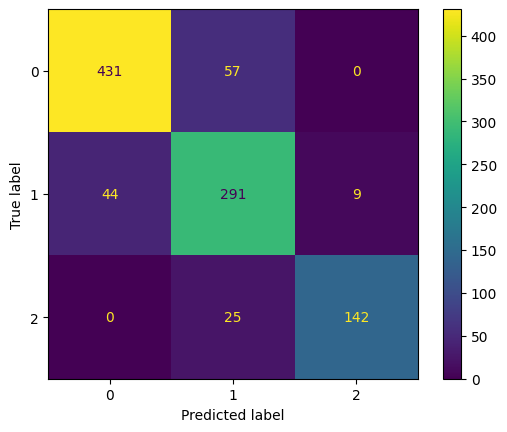

In [51]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       0.91      0.88      0.90       488
           1       0.78      0.85      0.81       344
           2       0.94      0.85      0.89       167

    accuracy                           0.86       999
   macro avg       0.88      0.86      0.87       999
weighted avg       0.87      0.86      0.87       999



**Tüm modelleri deneyelim**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# 2. Modelleri tanımla
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(max_depth=10, random_state = 0),
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth = 3 , random_state = 42),
    "SVC": SVC(kernel='rbf',C=1.0),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# 3. Accuracy sonuçlarını topla
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# 4. Sonuçları yazdır
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: Accuracy = {acc:.4f}")


Decision Tree: Accuracy = 0.9930
Logistic Regression: Accuracy = 0.8649
SVC: Accuracy = 0.8639
Random Forest: Accuracy = 0.8318
KNN: Accuracy = 0.7217
Naive Bayes: Accuracy = 0.3564


***Naive Bayes performansı beğenilmedi başka bir modelde ele tekrardan geçirelecek...***

In [54]:
title_vec_df.shape

(4991, 2000)

In [55]:
df2.shape

(4991, 8)

In [56]:
y.shape



(4991,)

**Bert İle Modeli eğitimi**



In [57]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertModel
from sklearn.metrics import accuracy_score, classification_report

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# =======================
# Dataset
# =======================
class RedditDataset(Dataset):
    def __init__(self, titles, nums, labels, tokenizer, max_len=64):
        self.titles = titles      # list or array
        self.nums = nums.astype("float32")   # numeric array
        self.labels = labels.astype("int64") # label array
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        enc = self.tokenizer(
            str(self.titles[idx]),
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": enc["input_ids"].squeeze(0),
            "attention_mask": enc["attention_mask"].squeeze(0),
            "nums": torch.tensor(self.nums[idx], dtype=torch.float),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

# =======================
# Model
# =======================
class BertWithNumeric(nn.Module):
    def __init__(self, num_numeric, freeze_bert=True):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        if freeze_bert:
            for p in self.bert.parameters():
                p.requires_grad = False
        bert_dim = self.bert.config.hidden_size  # 768
        self.num_mlp = nn.Sequential(
            nn.Linear(num_numeric, 64),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Sequential(
            nn.Linear(bert_dim + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 3)  # 3 sınıf
        )

    def forward(self, input_ids, attention_mask, nums):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = out.last_hidden_state[:,0,:]  # CLS token embedding
        nums_out = self.num_mlp(nums)
        concat = torch.cat([pooled, nums_out], dim=1)
        return self.classifier(concat)

# =======================
# Hazırlık
# =======================
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
MAX_LEN = 64

# title ve numeric ayır
titles_train = x_train[:,0]
nums_train   = x_train[:,1:]
titles_test  = x_test[:,0]
nums_test    = x_test[:,1:]

# Dataset & DataLoader
train_ds = RedditDataset(titles_train, nums_train, y_train, tokenizer, max_len=MAX_LEN)
test_ds  = RedditDataset(titles_test,  nums_test,  y_test,  tokenizer, max_len=MAX_LEN)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Model
model = BertWithNumeric(num_numeric=nums_train.shape[1], freeze_bert=True).to(DEVICE)

# Optimizer & Loss
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-4)
loss_fn = nn.CrossEntropyLoss()

# =======================
# Training Loop
# =======================
train_losses = []
val_losses = []
val_accuracies = []
EPOCHS = 13
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(ids, mask, nums)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)  # <- buraya ekle
    # Validation
    model.eval()
    preds, trues = [], []
    val_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            ids = batch["input_ids"].to(DEVICE)
            mask = batch["attention_mask"].to(DEVICE)
            nums = batch["nums"].to(DEVICE)
            labels = batch["labels"].to(DEVICE)

            logits = model(ids, mask, nums)

            loss = loss_fn(logits, labels)
            val_loss += loss.item()

            p = logits.argmax(dim=1).cpu().numpy()
            preds.extend(p)
            trues.extend(labels.cpu().numpy())

    val_loss /= len(test_loader)
    acc = accuracy_score(trues, preds)
    val_losses.append(val_loss)
    val_accuracies.append(acc)
    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {avg_loss:.4f} - Val Acc: {acc:.4f}")

print("\nFinal Classification Report:")
print(classification_report(trues, preds, digits=4))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Epoch 1/13 - Train Loss: 0.9790 - Val Acc: 0.5425
Epoch 2/13 - Train Loss: 0.6202 - Val Acc: 0.7788
Epoch 3/13 - Train Loss: 0.3816 - Val Acc: 0.8378
Epoch 4/13 - Train Loss: 0.2797 - Val Acc: 0.8569
Epoch 5/13 - Train Loss: 0.2252 - Val Acc: 0.8488
Epoch 6/13 - Train Loss: 0.1938 - Val Acc: 0.8629
Epoch 7/13 - Train Loss: 0.1623 - Val Acc: 0.8669
Epoch 8/13 - Train Loss: 0.1494 - Val Acc: 0.8519
Epoch 9/13 - Train Loss: 0.1293 - Val Acc: 0.8519
Epoch 10/13 - Train Loss: 0.1150 - Val Acc: 0.8498
Epoch 11/13 - Train Loss: 0.1026 - Val Acc: 0.8529
Epoch 12/13 - Train Loss: 0.0919 - Val Acc: 0.8488
Epoch 13/13 - Train Loss: 0.0876 - Val Acc: 0.8488

Final Classification Report:
              precision    recall  f1-score   support

           0     0.9011    0.8586    0.8793       488
           1     0.7573    0.8256    0.7900       344
           2     0.9119    0.8683    0.8896       167

    accuracy                         0.8488       999
   macro avg     0.8568    0.8508    0.8530 

Eğriler

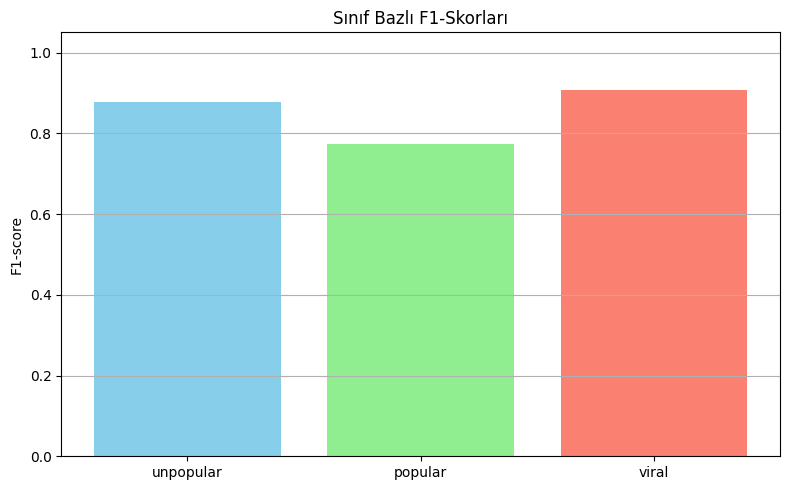

In [58]:
import matplotlib.pyplot as plt

classes = ["unpopular", "popular", "viral"]
f1_scores = [0.8779, 0.7738, 0.9075]

plt.figure(figsize=(8, 5))
plt.bar(classes, f1_scores, color=["skyblue", "lightgreen", "salmon"])
plt.ylim(0, 1.05)
plt.title("Sınıf Bazlı F1-Skorları")
plt.ylabel("F1-score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


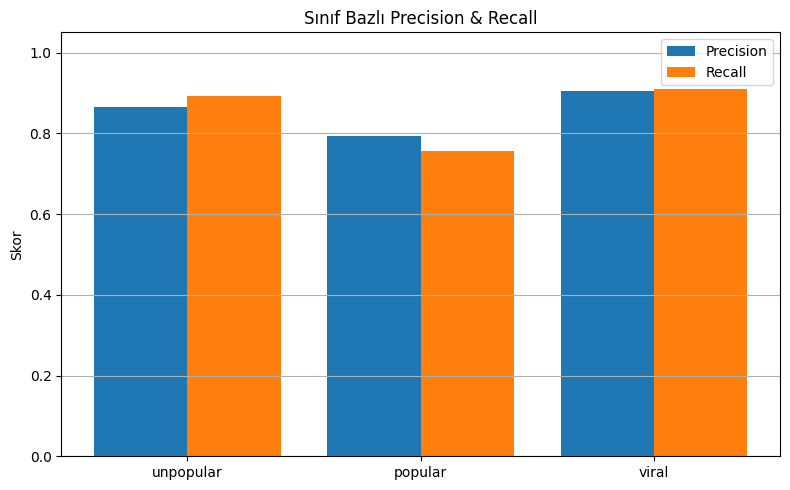

In [59]:
precision = [0.8648, 0.7927, 0.9048]
recall = [0.8914, 0.7558, 0.9102]

x = range(len(classes))
plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.4, label='Precision', align='center')
plt.bar([i + 0.4 for i in x], recall, width=0.4, label='Recall', align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.ylim(0, 1.05)
plt.title("Sınıf Bazlı Precision & Recall")
plt.ylabel("Skor")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


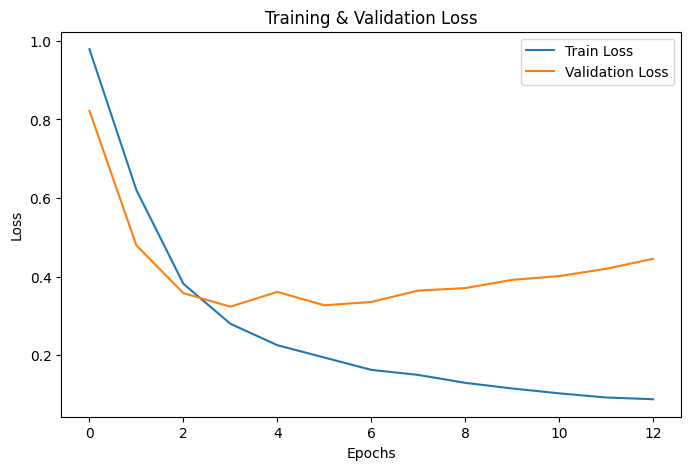

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


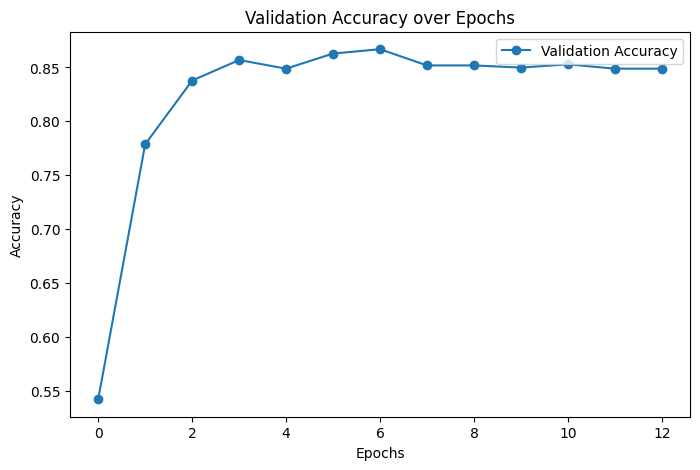

In [61]:
plt.figure(figsize=(8,5))
plt.plot(val_accuracies, marker="o", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()
plt.show()


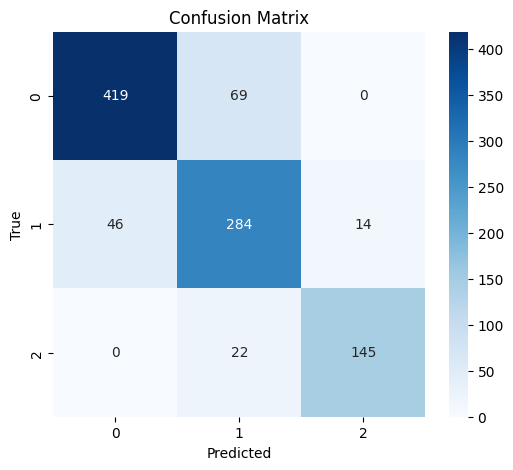

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(trues, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


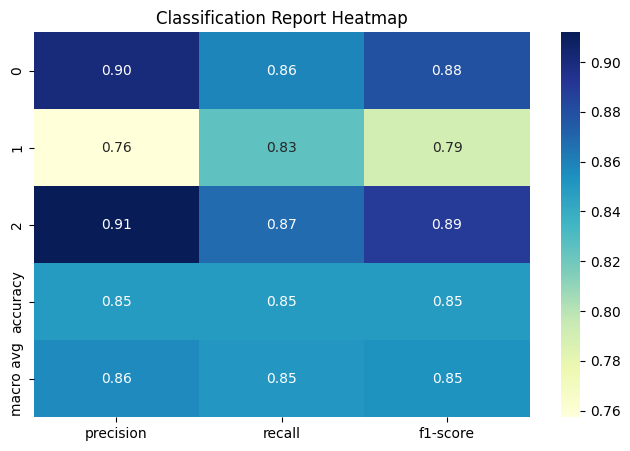

In [63]:
import pandas as pd

report = classification_report(trues, preds, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()
